In [2]:
import matplotlib.cm as cm
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math

In [4]:
data = pd.read_excel('data/1D_model_CH4_Mar2017.xls')

In [5]:
data

,r (km),"n(N2,cm-3)","n(CH4,cm-3)",N2 flux (cm-2 s-1),CH4 flux (cm-2 s-1),T (K),dT/dr (K /cm),D_CH4 (cm2/s),Kzz (cm2/s),r (km).1,"CN(N2,cm-2)","CN(CH4,cm-2)"
0,1190,2.022759e+15,7.189000e+12,179823.394497,6.659085e+08,38.902500,1.721408e-06,5.555171e+02,4000,1190,0.000000e+00,0.000000e+00
1,1191,1.647061e+15,5.863917e+12,179521.550833,6.647907e+08,45.486950,1.421730e-06,7.671234e+02,4000,1191,6.836443e+22,1.130780e+20
2,1192,1.385478e+15,4.941527e+12,179220.466524,6.636758e+08,51.825969,1.197406e-06,1.005710e+03,4000,1192,6.165521e+22,1.041336e+20
3,1193,1.194626e+15,4.268618e+12,178920.139025,6.625636e+08,57.887566,1.021323e-06,1.267273e+03,4000,1193,5.642595e+22,9.742365e+19
4,1194,1.050450e+15,3.760251e+12,178620.565802,6.614543e+08,63.639892,8.779695e-07,1.547345e+03,4000,1194,5.223761e+22,9.236838e+19
5,1195,9.385889e+14,3.365754e+12,178321.744330,6.603477e+08,69.052673,7.579192e-07,1.841099e+03,4000,1195,4.881167e+22,8.859547e+19
6,1196,8.499660e+14,3.053110e+12,178023.672098,6.592439e+08,74.098842,6.552028e-07,2.143513e+03,4000,1196,4.596212e+22,8.585512e+19
7,1197,7.785677e+14,2.801121e+12,177726.346601,6.581429e+08,78.756201,5.659350e-07,2.449561e+03,4000,1197,4.355943e+22,8.397227e+19
8,1198,7.202524e+14,2.595195e+12,177429.765348,6.570446e+08,83.008951,4.875410e-07,2.754432e+03,4000,1198,4.151013e+22,8.281816e+19
9,1199,6.720711e+14,2.424950e+12,177133.925858,6.559491e+08,86.848852,4.182861e-07,3.053746e+03,4000,1199,3.974468e+22,8.229230e+19


In [120]:
r = [row[0] for (index, row) in data.iterrows()]
CH4 = [row[2] for (index, row) in data.iterrows()]
N2 = [row[1] for (index, row) in data.iterrows()]
sum_n2_CH4 = [CH4[i] + N2[i] for i in range(len(N2))]

In [153]:
log_sum = [math.log(e) for e in sum_n2_CH4]

Text(0, 0.5, 'Radial distance (km)')

<Figure size 432x288 with 0 Axes>

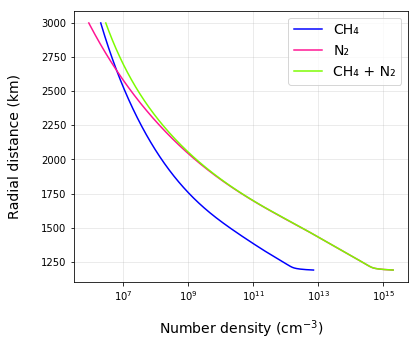

In [163]:
plt.figure()
fig, ax = plt.subplots(1,1,figsize=(6,5))
plt.plot(CH4, r, color = 'b', label = "CH\N{SUBSCRIPT FOUR}")
plt.plot(N2, r, color = 'deeppink', label = "N\N{SUBSCRIPT TWO}")
plt.plot(sum_n2_CH4, r, color = 'lawngreen', label = "CH\N{SUBSCRIPT FOUR} + N\N{SUBSCRIPT TWO}")

#ax.set_ylim(1000, 3000)
plt.xscale('log')
ax.legend(loc = 0, fontsize = 14)

ax.xaxis.grid(True, alpha = 0.3)
ax.yaxis.grid(True, alpha = 0.3)

#ax.set_xticks(n_sticks)
#x.set_yticks(y_sticks)

plt.xlabel('Number density (cm$^{-3}$)', labelpad = 15, fontsize = 14)
plt.ylabel('Radial distance (km)', labelpad = 20, fontsize = 14)